<a href="https://colab.research.google.com/github/sdding/Project/blob/main/Ai_06_%EC%9D%B4%EC%8A%B9%EC%88%98_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GAME
## **<목표 : 다음 분기에 어떤 게임을 설계해야 할까>**

* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 제작한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.


앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.


**1. 지역에 따라서 선호하는 게임 장르가 다를까**

**2. 연도별 게임의 트렌드가 있을까**

**3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스** 


위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

### Keyword

* Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
* Sprint 2 : Hypothesis Test, CI, Bayesian
* Sprint 3 : DR, PCA, Cluster


In [1]:
import pandas as pd

df = pd.read_csv('/content/vgames2.csv', index_col = 0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,271
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [3]:
#지역에 따른 선호하는 게임장르의 차이

# 데이터가 K와 M이 포함된 문자형이므로 숫자형으로 바꿔주는 함수
def trans(num):
  if 'K' in num:
    num = num[:-1]
    return float(num) / 1000
  elif 'M' in num:
    num = num[:-1]
    return float(num) 
  else:
    return float(num)

# 모든 column에 적용
for column in df.columns[5:]:
  df[column] = df[column].apply(trans)


df2 = df.dropna(subset = ['Genre'])    # 장르 결측치 제거
df2 = df2.set_index('Genre')           
df2 = df2.loc[:, 'NA_Sales':'Other_Sales']
df2 = df2.sort_index()                       # 장르에 따라 정렬


# 지역별 장르별 합
df_G = pd.DataFrame(index = df2.columns)

genre_list = list(df2.index.unique())
for genre in genre_list:
  df_G = pd.concat([df_G, pd.DataFrame(df2[df2.index == genre].sum())], axis = 1)

df_G.columns = genre_list
df_G


,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,874.81,105.66,223.20,408.05,446.44,123.35,357.19,319.54,581.92,182.96,680.52,68.70
EU_Sales,522.16,64.05,101.22,212.36,201.61,50.73,237.10,183.58,313.05,113.35,376.48,45.32
JP_Sales,157.90,51.95,87.34,105.27,130.65,56.87,56.40,344.95,38.28,63.70,135.37,49.46
Other_Sales,186.45,16.81,36.64,74.04,51.53,12.52,77.10,56.96,102.65,31.48,134.67,11.36


In [11]:
# 북미의 선호도와 유럽의 선호도가 연관이 있을까
# 귀무가설 : 연관이 없다
# 대립가설 : 연관이 있다
obs = pd.crosstab(df_G.loc['NA_Sales'], df_G.loc['EU_Sales'])
obs
from scipy.stats import chi2_contingency
chi2_contingency(obs)

# 0.2329가 나왔으므로 북미의 선호도와 유럽의 선호도는 연관이 있다

(132.0,
 0.23290755488982084,
 121,
 array([[0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333],
        [0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
         0.08333333, 0.08333333, 0.

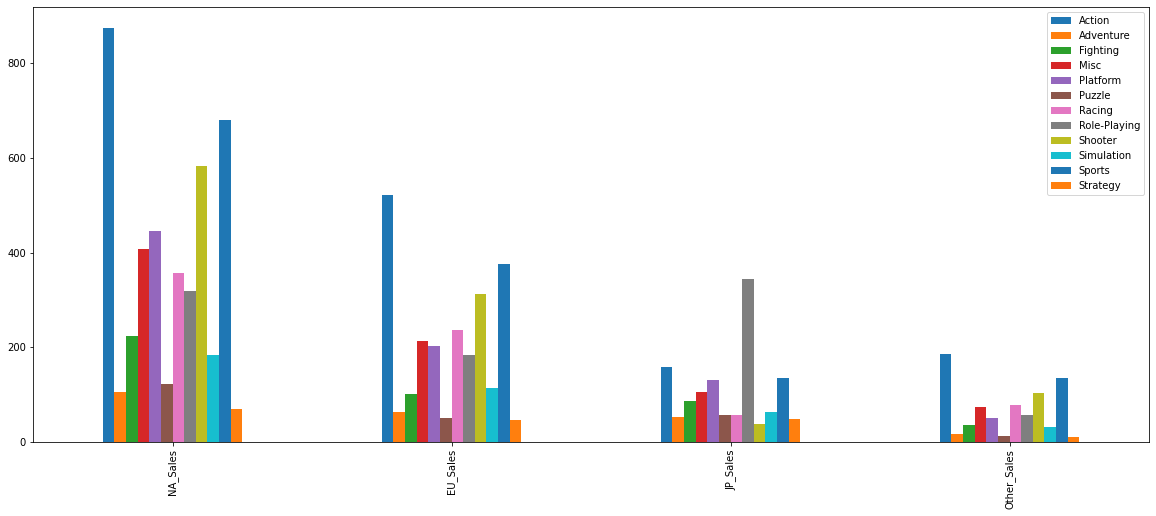

In [4]:
df_G.plot(kind = 'bar', figsize = (20, 8))    
# 지역별 장르의 선호도 그래프

In [9]:
# 연도별 게임의 트렌드?
df_Y = df.sort_values(by = 'Year')
df_Y['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']    # 모든 지역 판매량을 하나로 합치기
df_Y.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Platform', 'Publisher'], axis = 1, inplace = True)

df_Y.dropna(inplace = True)    # 연도, 장르가 없는 것들은 제거
    
df_Y['Year'] = df_Y['Year'].astype(int)

def year_trans(year):    # 한자리수거나 두자리수로 돼있는 연도 변경
  if year <= 20:
    year += 2000
  elif 20 < year < 100:
    year += 1900
  else:
    return year
  return year

df_Y['Year'] = df_Y['Year'].apply(year_trans)
df_Y = df_Y.reset_index(drop = True)

df_Y1 = df_Y.drop(df_Y[df_Y['Year'] >= 2000].index)    # 2000년대 이전 데이터
df_Y2 = df_Y.drop(df_Y[df_Y['Year'] < 2000].index)    # 2000년대 이후 데이터

df_Y2 = pd.DataFrame(df_Y2.groupby(['Year', 'Name', 'Genre']).Total_Sales.max())    # 연도 이름 장르별로 그룹화
df_Y2 = df_Y2.sort_values(by = ['Year', 'Total_Sales'], ascending = [True, False])   # 연도별 판매량 순으로 정렬
df_Y2 = df_Y2.groupby(['Year']).head(2)    # 1,2위 판매량만 추출
df_Y2[:-1]
# 2000년대 이후 연도별 판매량 1,2위

Total_Sales
Year Name                                             Genre                    
2000 Pokémon Crystal Version                          Role-Playing         6.39
     Final Fantasy IX                                 Role-Playing         5.31
2001 Gran Turismo 3: A-Spec                           Racing              14.97
     Grand Theft Auto III                             Action              13.10
2002 Grand Theft Auto: Vice City                      Action              16.15
     Pokemon Ruby/Pokemon Sapphire                    Role-Playing        15.84
2003 Need for Speed Underground                       Racing               7.20
     Mario Kart: Double Dash!!                        Racing               6.95
2004 Grand Theft Auto: San Andreas                    Action              20.81
     Gran Turismo 4                                   Racing              11.65
2005 Nintendogs                                       Simulation          24.75
     Mario Kart DS                                    Racing              23.43
2006 Wii Sports                                       Sports              82.74
     New Super Mario Bros.                            Platform            30.01
2007 Wii Fit                                          Sports              22.72
     Halo 3                                           Shooter             12.14
2008 Mario Kart Wii                                   Racing              35.83
     Super Smash Bros. Brawl                          Fighting            13.04
2009 Wii Sports Resort                                Sports              33.00
     New Super Mario Bros. Wii                        Platform            28.61
2010 Kinect Adventures!                               Misc                21.82
     Pokemon Black/Pokemon White                      Role-Playing        15.32
2011 Call of Duty: Modern Warfare 3                   Shooter             14.76
     Mario Kart 7                                     Racing              12.21
2012 Call of Duty: Black Ops II                       Shooter             14.04
     New Super Mario Bros. 2                          Platform             9.83
2013 Grand Theft Auto V                               Action              21.39
     Call of Duty: Ghosts                             Shooter             10.21
2014 Grand Theft Auto V                               Action              11.99
     Pokemon Omega Ruby/Pokemon Alpha Sapphire        Role-Playing        11.33
2015 Call of Duty: Black Ops 3                        Shooter             14.24
     FIFA 16                                          Sports               8.49
2016 FIFA 17                                          Sports               4.78
     Uncharted 4: A Thief's End                       Shooter              4.20
2017 Phantasy Star Online 2 Episode 4: Deluxe Package Role-Playing         0.03
     Brothers Conflict: Precious Baby                 Action               0.01

In [ ]:
df_Y1 = pd.DataFrame(df_Y1.groupby(['Year', 'Name', 'Genre']).Total_Sales.max())
df_Y1 = df_Y1.sort_values(by = ['Year', 'Total_Sales'], ascending = [True, False])
df_Y1 = df_Y1.groupby(['Year']).head(2)
df_Y1
# 2000년대 이전 연도별 판매량 1, 2위

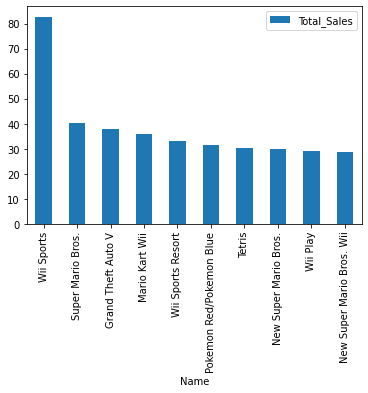

In [7]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.dropna(inplace = True)    # 연도, 장르가 없는 것들은 제거
    
df['Year'] = df['Year'].astype(int)

def year_trans(year):    # 한자리수거나 두자리수로 돼있는 연도 변경
  if year <= 20:
    year += 2000
  elif 20 < year < 100:
    year += 1900
  else:
    return year
  return year

df['Year'] = df['Year'].apply(year_trans)

df.loc[2009, 'Total_Sales'] += df.loc[10835, 'Total_Sales']    # GTA 판매량 합치기
df.loc[3484, 'Total_Sales'] += df.loc[10914, 'Total_Sales']
df.drop([10835, 10914], axis = 0, inplace = True)

df_R = df.sort_values(by = 'Total_Sales', ascending=False).head(10)    # 출고량 상위 10개
df_R.plot(x = 'Name', y = 'Total_Sales', kind = 'bar')

In [8]:
import numpy as np
df_R.reset_index(drop=True)
df_R.index = np.arange(1,11)    # 인덱스 바꾸기
df_R

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,37.77
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
5,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
7,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
8,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
9,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
10,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61


## 지역별 장르의 선호도

그래프를 보면 북미, 유럽, 기타 지역은 액션게임이 1위 스포츠게임이 2위 슈팅게임이 3위로 나타나고 있고 일본 지역만 롤플레잉 게임이 1위 액션게임이 2위 스포츠 게임이 3위로 나타나고 있습니다. 이것은 일본의 문화적 특성상 롤플레잉을 좋아하기 때문에 이런 양상을 보이고 가장 게임 시장이 큰 북미와 유럽에선 리얼리즘에 입각한 장르인 액션과 스포츠 게임들을 더 선호한다고 볼 수 있습니다.

## 연도별 게임의 트렌드

연도별 트렌드를 알기 위해서 최근인 2000년대 이후와 2000년대 이전으로 나누었습니다. 2000년대 이전의 데이터는 참고만 하는 데이터로 그다지 중요하지 않다고 판단하여 따로 빼놓았습니다. 2004년 정도까지 레이싱 게임이 대부분 1,2위를 차지하고 있고 액션게임도 포함되어 있습니다.2006년에 닌텐도 Wii가 처음 출시되면서 엄청난 인기를 끌어서 판매량이 급증하지만 2014년정도부터 판매량 자체가 점차 줄어들고 있는 추세를 보입니다. 아마도 스마트폰이 나오면서 모바일게임. 2010년대 부터는 기술의 발달로 슈팅게임이 인기를 끌었고 2016년 부터는 판매량이 급격하게 감소하고 있습니다.

## 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

출고량순으로 상위 10개의 게임만 차트에 나타냈습니다. 2006년 당시에 닌텐도 Wii가 굉장히 획기적인 게임이었기에 판매량 1위에 있습니다. 
현재도 꾸준히 인기인 슈퍼마리오가 1985년에 발매가 되어서 판매량 2위에 있습니다. 슈퍼마리오는 여러 버전으로 출시되어 10개중 3개가 슈퍼마리오입니다. 그 다음에 GTA 5, 마리오카트 가 있고 10개 중 9개가 닌텐도에서 제작되었습니다.


##<<다음 분기에 어떤 게임을 설계해야 할까>>

2018년 한국콘텐츠진흥원에 따르면 세계 게임 시장 규모는 1782억달러로, 이 중 콘솔 게임은 약 327억 달러를 차지하고 있습니다. 스마트폰 시대가 되면서 비디오 게임 판매량 자체가 예전에 비해 굉장히 줄어들었지만 여전히 인기가 있습니다. 점유율로 따지면 모바일이 35.8%, 콘솔 게임이 27.5%를 차지해 두 번째로 큰 게임 플랫폼입니다. 세계 콘솔게임 시장에서 유럽과 북미가 합하여 78.5%를 차지하고 있기 때문에 유럽과 북미 지역을 공략하는 게임을 만들어야 할것으로 보입니다. 특히 유럽, 북미 지역에서 항상 인기 있는 장르인 액션게임, 슈팅게임 위주로 설계를 하면 좋다고 생각합니다. 모바일게임의 장르가 보통 MMORPG에 치중되어 있기 때문에 롤플레잉 장르는 되도록이면 피해서 모바일게임과 차별화가 되도록 해야할 것으로 보입니다.